### Background 

This notebook includes an example exercise about observing how the amount of data affects to the histogram made of that data. The exercise consists of a theory part and a practical part.

# Example: Invariant mass histogram

In this exercise the CMS (Compact Muon Solenoid) detector and the concept of invariant mass is introduced. With the real data collected by CMS detector the effect of the amount of data to the histogram made of that data is observed.

### CMS detector

At CERN particles are accelerated and collided with the LHC (Large Hadron Collider) particle accelerator. With the CMS detector the new particles created in these collisions can be observed and measured. In the image below is the opened CMS detector.

<img src="../Images/CMS.jpg" alt="CMS-ilmaisin avattuna" style="height: 400px">

(Image: Domenico Salvagnin, https://commons.wikimedia.org/wiki/File:CMS@CERN.jpg)
<br>
<br>
<br>

### Invariant mass

Invariant mass $M$ is a value that can be calculated from the results of measurements of the CMS detector. Invariant mass is a mathematical concept, not a physical mass.

For example let's take a situation where a particle A decays to two particles B and C. The invariant mass of the two particles B and C is determined by the equation

$$ M = \sqrt{(E_1 + E_2)^2-(\vec{p_1} + \vec{p_2})^2}, $$

where $E_1$ and $E_2$ are the energies of the decay products and $\vec{p_1}$ and $\vec{p_2}$ the momenta of the decay products.

The invariant mass can be used to examine the excistence of the particle A. If particles B and C stem from the decay of the particle A, the invariant mass of them equals the physical mass of the particle A. If particles B and C stem from some other process than decay of A (there are enormous amount of processes in particle collisions), the invariant mass of B and C is something else.

So by determing the energies and the momenta of B and C the invariant mass to them can be calculated. This can be done to large amount of particle pairs. By doing that the excistence of the particle A might be proved.

In this excercise the values of invariant masses are already calculated.

### Let's try!

Let's start to observe the real data collected by CMS detector. We will focus on the decay of Z-boson to two muons (muon and antimuon).

We will use the data collected in 2011 [1]. From the primary dataset 10851 collision events where have been exactly two muons have been selected to the file "Zmumu_Run2011A_masses.csv". (The selection has been done with the code that is openly available at https://github.com/tpmccauley/dimuon-filter.)

The file includes readily calculated values of the invariant masses of two muons for the 10851 events. A histogram is a great tool for observing the values. The histogram reperesents how many values of $M$ there have been at certain range of values.

In the next exercise the mission is to examine __how the amount of data used affects to the histogram made of that data.__
<br>
<br>
<br>
[1]  CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).

### 1) Getting the file and the masses

Let's start with the code where the needed Python modules are imported and the data file is gotten. Explore the comments in the code and run the code by first clicking the cell active and then pressing _Ctrl_ + _Enter_. After that you can move to the part two. You might get a warning related to _matplotlib_ module but you don't have to worry about that.

In [2]:
# Import the needed modules. Pandas is for the data-analysis, numpy for scientific calculation
# and matplotlib.pyplot for making plots. Modules are named as pd, np and plt.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a new DataFrame structure from the file "Zmumu_Run2011A_masses.csv"
dataset = pd.read_csv('../Data/Zmumu_Run2011A_masses.csv')

# Create a Series structure (basically a list) and name it to "invariant_mass".
# Save the column "M" from the "dataset" to the variable "invariant_mass".
invariant_mass = dataset['M']

# Create an empty list "selected", where the selected amount of invariant masses will be saved.
selected = []

### Selecting the amount of data

The code below asks how many events will be selected to the histogram. After that the code plots the histogram of the selected invariant masses.

Run the code by clicking the code cell active and by pressing _Ctrl_ + _Enter_. You can re-run the code and enter the new amount of data by pressing _Ctrl_ + _Enter_ again.

Examine how the amount of the data used affects to the histogram. Which values of the invariant mass there seems to be most? What you can conclude from those values?

By examining the code predict what will happen if you enter a number bigger than 10851 for the asked amount of data. Try your prediction by running the code.

Enter the amount of events wanted: 1000

 You selected 1000 invariant mass values from the whole data.


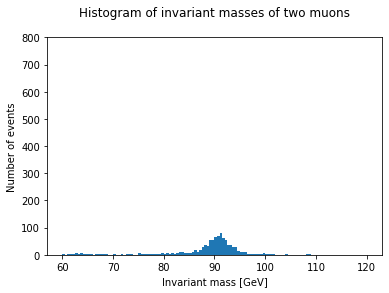

In [3]:
# Ask user to enter the number of events wanted. Save the number to variable "amount".
amount = int(input('Enter the amount of events wanted: '))

# Check if user have selected more events than there are available.
# If not select that amount of invariant masses from the variable "invariant_mass".
# Masses will be selected in order.
if amount > 10851:
    print('''You have tried to select more data than there are available in the file.
The histogram couldn't be drawn. The maximum amount of the data is 10851.''')
else:
    for f in range(amount):
        M = invariant_mass[f]
        selected.append(M)
    print('\n You selected {} invariant mass values from the whole data.'.format(amount))

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
%matplotlib inline

# Create the histogram from data in variable "selected". Set bins and range to histogram.
plt.hist(selected, bins=120, range=(60,120))

# Set y-axis from 0 to 800.
axes = plt.gca()
axes.set_ylim([0,800])

# Name the axises and give the title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant masses of two muons\n')

# Empty the variable "selected" for the next run.
selected = []

### 3) Evolving of the histogram when the amount of data increases

Let's observe with series of images how the histogram will change when the amount of data are increased.

The code below will create 11 different histograms of invariant masses from the same data. Between every image 1000 more values of invariant masses are taken to the histogram. Run the code by clicking the code cell active and pressing _Ctrl_ + _Enter_. Observe the images and explain what you see.

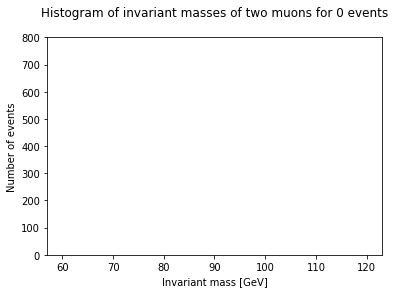

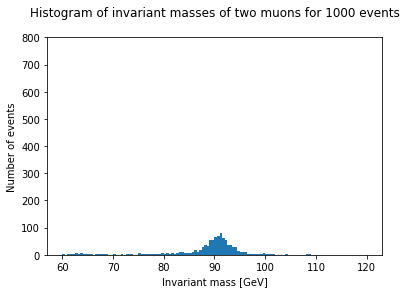

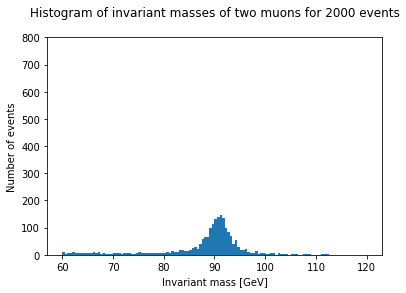

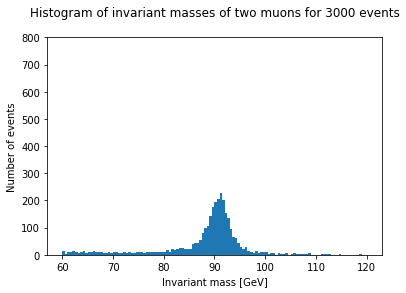

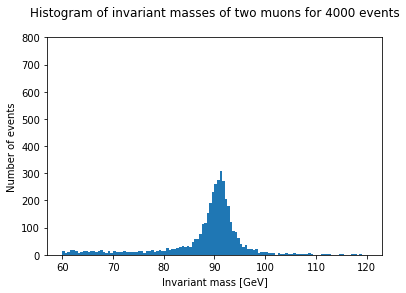

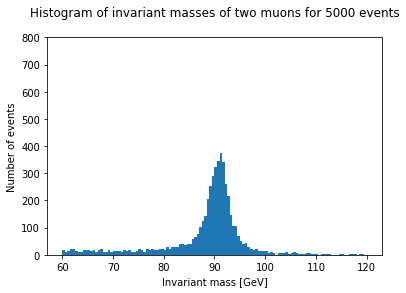

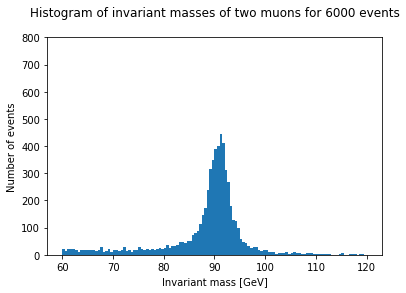

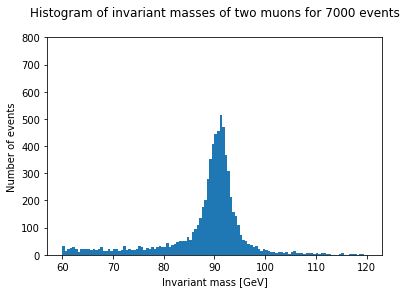

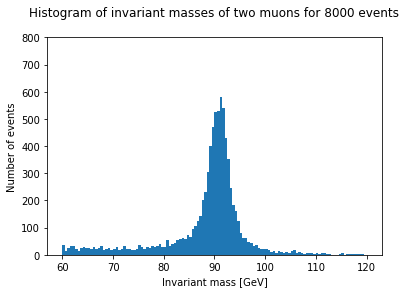

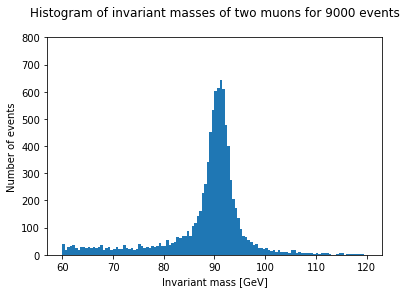

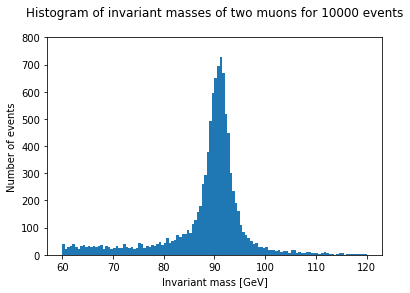

In [4]:
# Loop where a new histogram is plotted after 1000 events until 10000 events have reached.
for a in range(0,10851,1000):
    T = invariant_mass[0:a]
    
    %matplotlib inline
    plt.hist(T, bins=120, range=(60,120))
    
    # Set y-axis from 0 to 800.
    axes = plt.gca()
    axes.set_ylim([0,800])
    
    plt.xlabel('Invariant mass [GeV]')
    plt.ylabel('Number of events')
    plt.title('Histogram of invariant masses of two muons for {} events\n'.format(len(T)))
    plt.show()